In [252]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import gaussian_filter

alpha = 0.1  # tension
beta = 0.1  # stiffness
gamma = 0.01  # step size
w_line = 0.1
w_ext = 1

image = Image.open("cameraman.tif")
# convert to grayscale
if image.mode != "L":
    image = image.convert("L")

image_np = np.array(image)

smoothed_image = gaussian_filter(image, sigma=1) 
gy, gx = np.gradient(smoothed_image)


# 400 points in between 0 and 2pi (theta)
t = np.linspace(0, 2 * np.pi, 200)
# Radius 100, dist from center 200
y_init = 115 + 25 * np.sin(t)
# Radius 100, dist from center 100
x_init = 50 + 25 * np.cos(t)
snake = np.array([x_init, y_init]).T
snake_initial = snake.copy()

num_iterations = 10000
for i in range(num_iterations):
    # Compute the internal forces 
    # separately for x and y
    # use negative vals to get dir & magnitude 
    # of steepest descent
    internal_forces = -alpha * np.gradient(
        snake, axis=0)
    internal_forces += -beta * np.gradient(
        np.gradient(snake, axis=0), axis=0)

    x_indices = snake[:, 0].astype(int)
    y_indices = snake[:, 1].astype(int)

    # Clip to keep within range of image
    x_indices[:] = np.clip(x_indices, 
                           a_min=0, 
                           a_max=
                           smoothed_image.
                           shape[1] 
                           - 1)
    y_indices[:] = np.clip(y_indices, a_min=0, 
                           a_max=
                           smoothed_image.
                           shape[0]
                           - 1)

    # Get the intensity at each snake point 
    # (which is a float)
    # for simplicity, 
    # just find which pixel the snake's 
    # point falls in
    # and use that.
    x_forces = gx[y_indices, x_indices]
    y_forces = gy[y_indices, x_indices]
    external_forces = np.stack([x_forces, 
                                y_forces], 
                               axis=1)
    
    # Update the snake's position
    snake += gamma * ((w_line * 
                       internal_forces) +
                       (w_ext * 
                        external_forces))


In [246]:


mean_intensity_before = np.mean(smoothed_image[snake_initial[:, 0].astype(int), snake_initial[:, 1].astype(int)])
print(mean_intensity_before)
mean_intensity_after = np.mean(smoothed_image[snake[:, 0].astype(int), snake[:, 1].astype(int)])
print(mean_intensity_after)


138.79
142.435


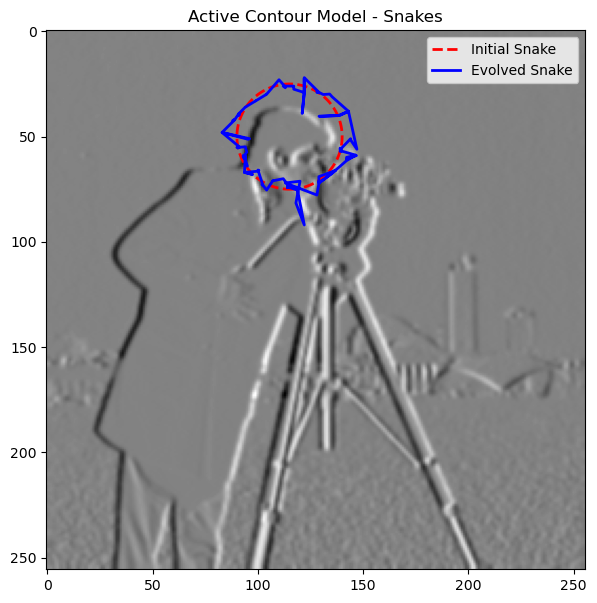

In [251]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(gx, cmap=plt.cm.gray)
ax.plot(snake_initial[:, 1], snake_initial[:, 0], '--r', lw=2, label="Initial Snake")
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=2, label="Evolved Snake")
ax.set_title("Active Contour Model - Snakes")
plt.legend()
plt.show()

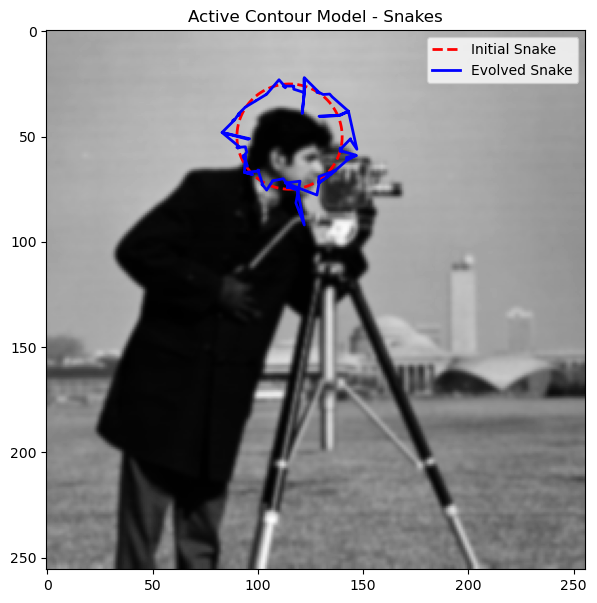

In [250]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(smoothed_image, cmap=plt.cm.gray)
ax.plot(snake_initial[:, 1], snake_initial[:, 0], '--r', lw=2, label="Initial Snake")
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=2, label="Evolved Snake")
ax.set_title("Active Contour Model - Snakes")
plt.legend()
plt.show()